<a href="https://colab.research.google.com/github/koteshvarma2/MLT/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

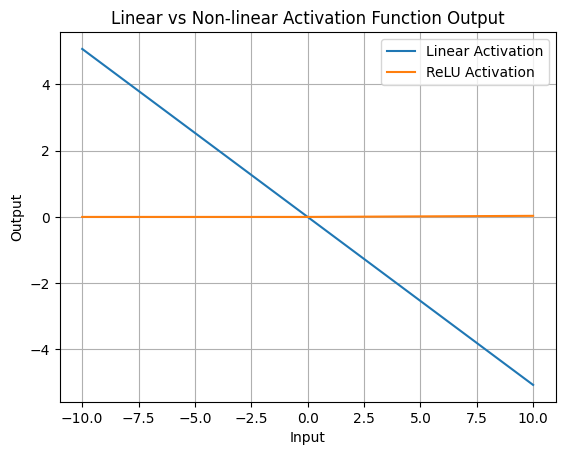

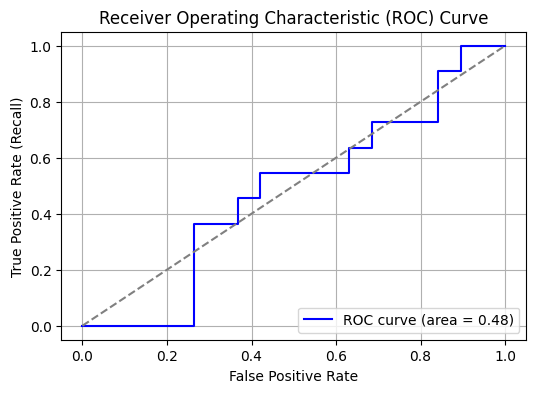

Precision: 0.35
Recall: 0.55


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = np.linspace(-10, 10, 100)

model_linear = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(1, activation='linear')
])

model_nonlinear = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(1, activation='relu')
])

y_linear = model_linear(x.reshape(-1, 1)).numpy()
y_nonlinear = model_nonlinear(x.reshape(-1, 1)).numpy()

plt.plot(x, y_linear, label='Linear Activation')
plt.plot(x, y_nonlinear, label='ReLU Activation')
plt.title('Linear vs Non-linear Activation Function Output')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
